### Stock Market Prediction And Forecasting Using Stacked LSTM

In [28]:
### Keras and Tensorflow >2.0

In [29]:
### Data Collection
import pandas_datareader as pdr
key=""

In [30]:
df = pdr.get_data_tiingo('AAPL', api_key='196fefb8c295d79c31a6779b3e833c4683f16656')

In [34]:
df.head()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
AAPL   2016-12-08 00:00:00+00:00  112.12  112.43  ...      0.0          1.0
       2016-12-09 00:00:00+00:00  113.95  114.70  ...      0.0          1.0
       2016-12-12 00:00:00+00:00  113.30  115.00  ...      0.0          1.0
       2016-12-13 00:00:00+00:00  115.19  115.92  ...      0.0          1.0
       2016-12-14 00:00:00+00:00  115.19  116.20  ...      0.0          1.0

[5 rows x 12 columns]

In [35]:
df.tail()

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
AAPL   2021-11-30 00:00:00+00:00  165.30  165.5200  ...      0.0          1.0
       2021-12-01 00:00:00+00:00  164.77  170.3000  ...      0.0          1.0
       2021-12-02 00:00:00+00:00  163.76  164.2000  ...      0.0          1.0
       2021-12-03 00:00:00+00:00  161.84  164.9600  ...      0.0          1.0
       2021-12-06 00:00:00+00:00  165.32  167.8799  ...      0.0          1.0

[5 rows x 12 columns]

In [36]:
df1=df.reset_index()['close']

In [37]:
df1

0       112.12
1       113.95
2       113.30
3       115.19
4       115.19
         ...  
1252    165.30
1253    164.77
1254    163.76
1255    161.84
1256    165.32
Name: close, Length: 1257, dtype: float64

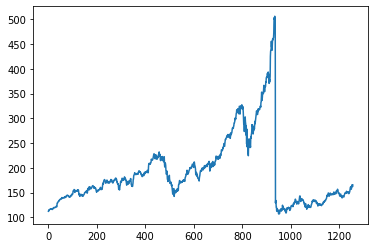

In [38]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [39]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [40]:
import numpy as np

In [41]:
df1

0       112.12
1       113.95
2       113.30
3       115.19
4       115.19
         ...  
1252    165.30
1253    164.77
1254    163.76
1255    161.84
1256    165.32
Name: close, Length: 1257, dtype: float64

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [43]:
print(df1)

[[0.0132248 ]
 [0.01780839]
 [0.01618034]
 ...
 [0.14256731]
 [0.1377583 ]
 [0.14647464]]


In [44]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [45]:
training_size,test_size

(817, 440)

In [47]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [48]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [49]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [50]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [51]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [52]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

In [126]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [127]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_15 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_18 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [128]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 361ms/step - loss: 0.0228 - val_loss: 0.0315
Epoch 2/100
12/12 [==============================] - 3s 265ms/step - loss: 0.0068 - val_loss: 0.0263
Epoch 3/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0039 - val_loss: 0.0222
Epoch 4/100
12/12 [==============================] - 3s 267ms/step - loss: 0.0026 - val_loss: 0.0348
Epoch 5/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0023 - val_loss: 0.0252
Epoch 6/100
12/12 [==============================] - 3s 265ms/step - loss: 0.0021 - val_loss: 0.0221
Epoch 7/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0021 - val_loss: 0.0212
Epoch 8/100
12/12 [==============================] - 3s 261ms/step - loss: 0.0021 - val_loss: 0.0212
Epoch 9/100
12/12 [==============================] - 3s 261ms/step - loss: 0.0019 - val_loss: 0.0203
Epoch 10/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0019 - val_lo

In [129]:
import tensorflow as tf

In [130]:
tf.__version__

'2.7.0'

In [131]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [132]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [133]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

198.616744574401

In [134]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

179.05959704625303

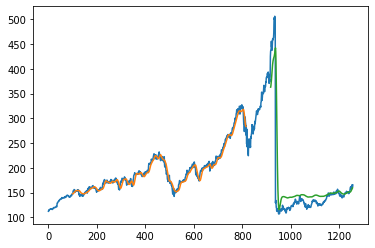

In [135]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [136]:
len(test_data)

440

In [137]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [138]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [139]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13637885]
101
1 day input [0.08919224 0.09845961 0.09658109 0.10008766 0.10449593 0.10557295
 0.10001252 0.09552912 0.09718222 0.09773325 0.09688165 0.10149029
 0.10046337 0.10073889 0.09843456 0.09830933 0.09708203 0.09773325
 0.10532248 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719
 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612
 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 

In [140]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [141]:
import matplotlib.pyplot as plt

In [142]:
len(df1)

1257

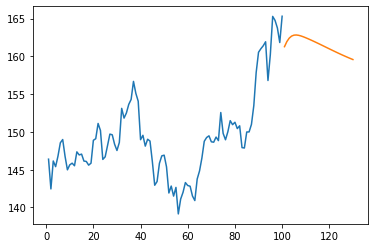

In [143]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

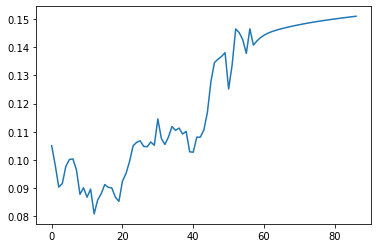

In [115]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [116]:
df3=scaler.inverse_transform(df3).tolist()

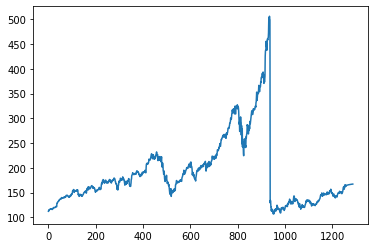

In [117]:
plt.plot(df3)